In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
#df = pd.read_csv("src/Agribalyse_Detail ingredient.csv")
df = pd.read_csv("~/Desktop/DataSciences/8 - PROJET/agribalyse/data/raw/Agribalyse_Detail ingredient.csv")
df.head(1)

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.32923,16.984964,7.404112,0.337769,1.475548,0.251356


In [ ]:
# 9 indicateurs retenus car satisfaisant ( niveai 1 et 2 )

In [3]:
cols = ["Ciqual AGB","Ciqual code","Nom Français","Groupe d'aliment","Sous-groupe d'aliment","LCI Name","Ingredients",
        "Score unique EF (mPt/kg de produit)",
        "Changement climatique (kg CO2 eq/kg de produit)","Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)",
       "Particules (E-06 disease inc./kg de produit)","Acidification terrestre et eaux douces (mol H+ eq/kg de produit)",
       "Eutrophisation terreste (mol N eq/kg de produit)","Eutrophisation eaux douces (E-03 kg P eq/kg de produit)",
       "Eutrophisation marine (E-03 kg N eq/kg de produit)","Rayonnements ionisants (kBq U-235 eq/kg de produit)",
       "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)"]


df = df[cols]


In [4]:
# rename colonnes 

df.columns = ["Ciqual_AGB","Ciqual_code","Nom_Français","Groupe_aliment","Sous_Grp_aliment","LCI_Name","Ingredients",
              "Score_EF",
              "Changement_climatique","Appauvrissement_couche_ozone","exposition_Particules_fines","Acidification_terre_eaux",
             "Eutrophisation_terreste","Eutrophisation_eaux_douces","Eutrophisation_marine","Rayonnements_ionisants",
             "Formation_photochimique_ozone "]

In [5]:
df.head(2)

,Ciqual_AGB,Ciqual_code,Nom_Français,Groupe_aliment,Sous_Grp_aliment,LCI_Name,Ingredients,Score_EF,Changement_climatique,Appauvrissement_couche_ozone,exposition_Particules_fines,Acidification_terre_eaux,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Rayonnements_ionisants,Formation_photochimique_ozone
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,0.046616,0.006761,0.029441,0.052027,1.329230,0.027466,0.631131
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,0.000781,0.000105,0.000328,0.004760,0.189983,0.004964,0.057538


In [23]:
printmd("**10 de groupe d'aliments**")
df.groupby('Groupe_aliment').size().sort_values(ascending=False).reset_index()

**10 de groupe d'aliments**

,Groupe_aliment,0
0,entrées et plats composés,1837
1,produits céréaliers,1741
2,"viandes, œufs, poissons",519
3,aides culinaires et ingrédients divers,357
4,lait et produits laitiers,293
5,"fruits, légumes, légumineuses et oléagineux",228
6,boissons,205
7,aliments infantiles,143
8,produits sucrés,140
9,glaces et sorbets,125


In [19]:
print("")
printmd("**Pire score environnemental par recette**")
df.groupby(['Ciqual_code','Nom_Français'])['Score_EF'].sum().sort_values(ascending=False).head(10).reset_index()

**Pire score environnemental par recette**

,Ciqual_code,Nom_Français,Score_EF
0,30155,"Merguez, boeuf et mouton, cuite",4.292133
1,30156,"Merguez, boeuf et mouton, crue",4.260867
2,9863,"Nouilles asiatiques aromatisées, déshydratées",4.172748
3,30154,"Merguez, bœuf, mouton et porc, crue",3.479717
4,19698,"Tiramisu, rayon frais",3.438330
5,25159,Tajine de mouton,3.231135
6,25163,"Boeuf, boulettes cuites",3.161151
7,25124,Navarin d'agneau aux légumes,3.056632
8,30152,"Merguez, pur bœuf, crue",3.044080
9,25602,"Salade composée avec viande ou poisson, appert...",2.874360


#### Exemple de score environnemental : Boulettes de bieuf cuite

**Score environnemental par kg de produit 3.16**

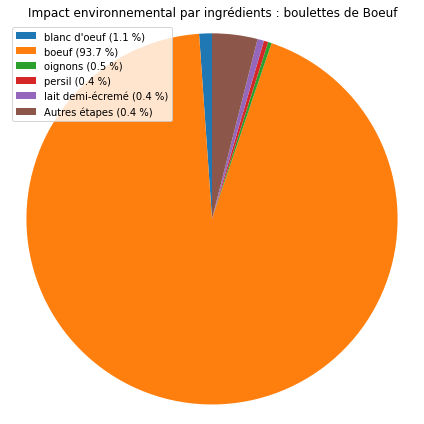

In [35]:
df_25163 = df[df['Ciqual_code'] == 25163]

printmd(f"**Score environnemental par kg de produit {round(df_25163.Score_EF.sum(),2)}**")

plt.figure(figsize = (6, 6))
labels = df_25163.Ingredients
sizes = df_25163.Score_EF

labels = [r"blanc d'oeuf (1.1 %)", r'boeuf (93.7 %)', 
r'oignons (0.5 %)', r'persil (0.4 %)', r'lait demi-écremé (0.4 %)', r'Autres étapes (0.4 %)']


patches, texts = plt.pie(sizes, startangle=90)

plt.legend(patches,labels, loc="best")

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title("Impact environnemental par ingrédients : boulettes de Boeuf")

plt.axis('equal')
plt.tight_layout()
plt.show()

#### Exemple de score environnemental : Pizza jambon fromage

In [ ]:
df_25435 = df[df['Ciqual_code'] == 25435]
df_25435.Ingredients



**Score environnemental par kg de produit 0.43**

<ipython-input-37-ba6a85afca89>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts = plt.pie(sizes, startangle=90)


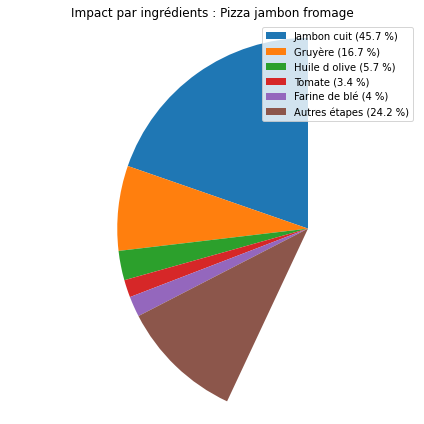

In [37]:
df_25435 = df[df['Ciqual_code'] == 25435]

printmd(f"**Score environnemental par kg de produit {round(df_25435.Score_EF.sum(),2)}**")

plt.figure(figsize = (6, 6))
labels = df_25435.Ingredients
sizes = df_25435.Score_EF

labels = [r"Jambon cuit (45.7 %)", r'Gruyère (16.7 %)', 
r'Huile d olive (5.7 %)', r'Tomate (3.4 %)', r'Farine de blé (4 %)', r'Autres étapes (24.2 %)']


patches, texts = plt.pie(sizes, startangle=90)

plt.legend(patches,labels, loc="best")

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title("Impact par ingrédients : Pizza jambon fromage")

plt.axis('equal')
plt.tight_layout()
plt.show()

#### Fortes corrélations Score EF / le changement climatique - particules fines - Acidification - Eutrophisation terrestre et eutrophisation marine

In [38]:
df.corr()

,Ciqual_AGB,Ciqual_code,Score_EF,Changement_climatique,Appauvrissement_couche_ozone,exposition_Particules_fines,Acidification_terre_eaux,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Rayonnements_ionisants,Formation_photochimique_ozone
Ciqual_AGB,1.000000,1.000000,-0.001866,0.012516,-0.002609,-0.002347,-0.000183,-0.000417,-0.010702,0.009701,-0.029757,0.001272
Ciqual_code,1.000000,1.000000,-0.001866,0.012516,-0.002609,-0.002347,-0.000183,-0.000417,-0.010702,0.009701,-0.029757,0.001272
Score_EF,-0.001866,-0.001866,1.000000,0.924611,0.659626,0.959009,0.953467,0.947484,0.698390,0.929788,0.380462,0.617214
Changement_climatique,0.012516,0.012516,0.924611,1.000000,0.461890,0.900096,0.901003,0.926164,0.603945,0.888125,0.222129,0.473993
Appauvrissement_couche_ozone,-0.002609,-0.002609,0.659626,0.461890,1.000000,0.609345,0.589293,0.495102,0.426228,0.581852,0.521941,0.730202
exposition_Particules_fines,-0.002347,-0.002347,0.959009,0.900096,0.609345,1.000000,0.999113,0.980543,0.588651,0.913956,0.247366,0.688532
Acidification_terre_eaux,-0.000183,-0.000183,0.953467,0.901003,0.589293,0.999113,1.000000,0.983106,0.575238,0.913420,0.230613,0.683689
Eutrophisation_terreste,-0.000417,-0.000417,0.947484,0.926164,0.495102,0.980543,0.983106,1.000000,0.590063,0.893853,0.229492,0.539576
Eutrophisation_eaux_douces,-0.010702,-0.010702,0.698390,0.603945,0.426228,0.588651,0.575238,0.590063,1.000000,0.678475,0.346352,0.299947
Eutrophisation_marine,0.009701,0.009701,0.929788,0.888125,0.581852,0.913956,0.913420,0.893853,0.678475,1.000000,0.220662,0.657423


In [39]:
colonnes = ['Score_EF','Changement_climatique','exposition_Particules_fines','Acidification_terre_eaux',
            'Eutrophisation_terreste','Eutrophisation_marine']
df_chgeClimatique = df[colonnes]
#df_chgeClimatique

Text(0, 0.5, 'Score environnemental')

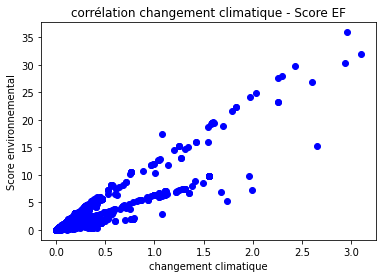

In [40]:
plt.title('corrélation changement climatique - Score EF')

x = df_chgeClimatique.Score_EF
y1 = (df_chgeClimatique.Changement_climatique)

plt.scatter(x, y1,color='b')
plt.xlabel("changement climatique")
plt.ylabel("Score environnemental")

Text(0, 0.5, 'Score environnemental')

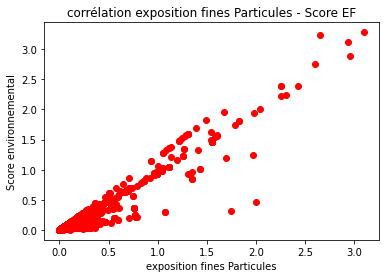

In [41]:
plt.title('corrélation exposition fines Particules - Score EF')

x = df_chgeClimatique.Score_EF
y2 = (df_chgeClimatique.exposition_Particules_fines)
plt.scatter(x, y2,color='r')
plt.xlabel("exposition fines Particules")
plt.ylabel("Score environnemental")

Text(0, 0.5, 'Score environnemental')

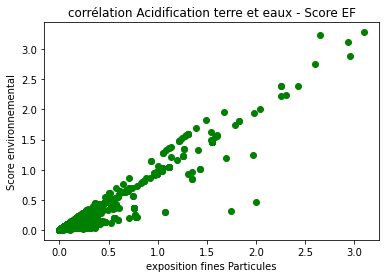

In [42]:
plt.title('corrélation Acidification terre et eaux - Score EF')

x = df_chgeClimatique.Score_EF
y3 = (df_chgeClimatique.Acidification_terre_eaux)
plt.scatter(x, y2,color='g')
plt.xlabel("exposition fines Particules")
plt.ylabel("Score environnemental")

Text(0, 0.5, 'Score environnemental')

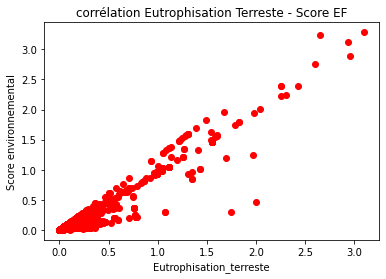

In [43]:
plt.title('corrélation Eutrophisation Terreste - Score EF')

x = df_chgeClimatique.Score_EF
y4 = (df_chgeClimatique.Eutrophisation_terreste)
plt.scatter(x, y2,color='r')
plt.xlabel("Eutrophisation_terreste")
plt.ylabel("Score environnemental")

Text(0, 0.5, 'Score environnemental')

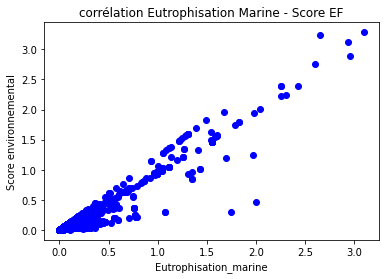

In [44]:
plt.title('corrélation Eutrophisation Marine - Score EF')

x = df_chgeClimatique.Score_EF
y5 = (df_chgeClimatique.Eutrophisation_marine)
plt.scatter(x, y2,color='b')
plt.xlabel("Eutrophisation_marine")
plt.ylabel("Score environnemental")

In [45]:
df[df['Ciqual_code'] == 25404].Score_EF.sum()

0.246535234

In [46]:
df_pizza = df[(df["Ciqual_code"] == 25435) | 
              (df["Ciqual_code"] == 25457) | 
              (df["Ciqual_code"] == 25462) |
              (df["Ciqual_code"] == 25463) |
              (df["Ciqual_code"] == 25464) | 
              (df["Ciqual_code"] == 25472) | 
              (df["Ciqual_code"] == 25477) |
              (df["Ciqual_code"] == 25478) |
              (df["Ciqual_code"] == 25570) | 
              (df["Ciqual_code"] == 26270) | 
              (df["Ciqual_code"] == 26272) |
              (df["Ciqual_code"] == 26274) ]

In [47]:
df_pizza.head(1)

,Ciqual_AGB,Ciqual_code,Nom_Français,Groupe_aliment,Sous_Grp_aliment,LCI_Name,Ingredients,Score_EF,Changement_climatique,Appauvrissement_couche_ozone,exposition_Particules_fines,Acidification_terre_eaux,Eutrophisation_terreste,Eutrophisation_eaux_douces,Eutrophisation_marine,Rayonnements_ionisants,Formation_photochimique_ozone
3354,25457,25457,"Pizza à la viande, type bolognaise",entrées et plats composés,"pizzas, tartes et crêpes salées","Pizza, bolognese-style w meat",Bœuf haché,0.607649,7.36369,0.134058,0.592064,0.088593,0.393063,0.330364,18.938863,0.306083,9.121744


In [48]:
print(f"Score environnemental par type de pizza")
df_pizza.groupby(['Nom_Français'])['Score_EF'].sum().sort_values(ascending=False).reset_index()

Score environnemental par type de pizza


,Nom_Français,Score_EF
0,"Pizza à la viande, type bolognaise",0.803266
1,"Pizza aux lardons, oignons et fromage",0.564180
2,Pizza 4 fromages,0.471858
3,Pizza jambon fromage,0.430275
4,Pizza au speck ou jambon cru,0.430275
5,Pizza au poulet,0.430275
6,Pizza aux légumes ou Pizza 4 saisons,0.377086
7,Pizza aux fruits de mer,0.367327
8,Pizza au thon,0.367327
9,Pizza au saumon,0.367327


####  Score environnemental PEF  des PIZZAS
PEF -  Product Environmental Footprint

[Text(0, 0, 'Pizza à la viande, type bolognaise'),
 Text(1, 0, 'Pizza aux lardons, oignons et fromage'),
 Text(2, 0, 'Pizza 4 fromages'),
 Text(3, 0, 'Pizza jambon fromage'),
 Text(4, 0, 'Pizza au speck ou jambon cru'),
 Text(5, 0, 'Pizza au poulet'),
 Text(6, 0, 'Pizza aux légumes ou Pizza 4 saisons'),
 Text(7, 0, 'Pizza aux fruits de mer'),
 Text(8, 0, 'Pizza au thon'),
 Text(9, 0, 'Pizza au saumon'),
 Text(10, 0, 'Pizza au chorizo ou salami'),
 Text(11, 0, 'Pizza champignons fromage')]

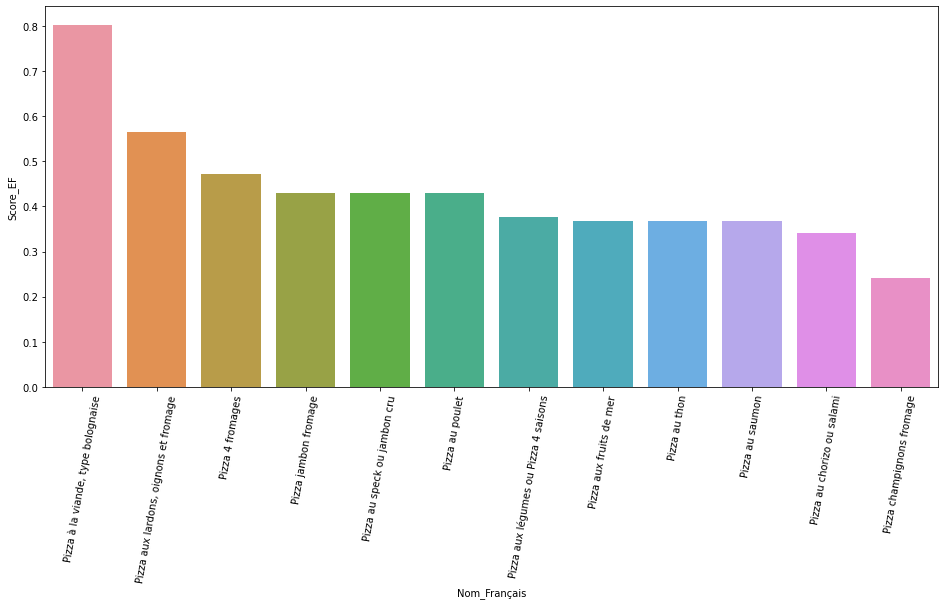

In [50]:
s = df_pizza.groupby(['Nom_Français'])['Score_EF'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(16,7))

ax = sns.barplot(x='Nom_Français', y='Score_EF', data=s)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)